# 📊 Telco Customer Churn - Data Exploration

This notebook explores the Telco Customer Churn dataset from Kaggle.

**Dataset**: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

**Objective**: Understand the dataset structure, features, and target variable distribution.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("📚 Libraries imported successfully!")

📚 Libraries imported successfully!


## 📥 Load Dataset

**Note**: Download the dataset from Kaggle and place it in the `../data/` folder as `Telco-Customer-Churn.csv`

In [7]:
# Load the Telco Customer Churn dataset
try:
    df = pd.read_csv('../data/customer_churn.csv')
    print("✅ Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print("❌ Dataset not found!")
    print("Please download from: https://www.kaggle.com/datasets/blastchar/telco-customer-churn")
    print("And save as: '../data/Telco-Customer-Churn.csv'")

✅ Dataset loaded successfully!
Dataset shape: (7043, 21)


## 🔍 Dataset Overview

In [8]:
# Basic dataset information
print("📊 DATASET OVERVIEW")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display first few rows
print("\n📋 First 5 rows:")
df.head()

📊 DATASET OVERVIEW
Rows: 7,043
Columns: 21
Memory usage: 7.79 MB

📋 First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Column information
print("📝 COLUMN INFORMATION")
print(f"Total columns: {len(df.columns)}")
print(f"\nColumns: {list(df.columns)}")

# Data types
print("\n📈 DATA TYPES")
print(df.dtypes.value_counts())
print("\nDetailed data types:")
df.dtypes

📝 COLUMN INFORMATION
Total columns: 21

Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

📈 DATA TYPES
object     18
int64       2
float64     1
Name: count, dtype: int64

Detailed data types:


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## 🎯 Target Variable Analysis

🎯 TARGET VARIABLE ANALYSIS

Churn distribution:
       Count  Percentage
Churn                   
No      5174   73.463013
Yes     1869   26.536987

📊 Overall churn rate: 26.5%


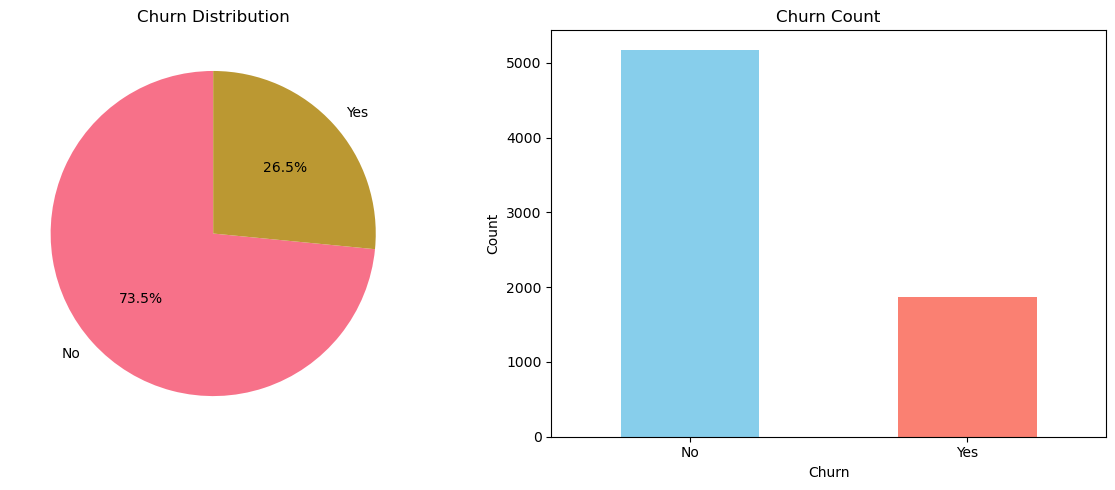

In [10]:
# Analyze target variable (Churn)
print("🎯 TARGET VARIABLE ANALYSIS")

if 'Churn' in df.columns:
    print("\nChurn distribution:")
    churn_counts = df['Churn'].value_counts()
    churn_percentages = df['Churn'].value_counts(normalize=True) * 100
    
    churn_summary = pd.DataFrame({
        'Count': churn_counts,
        'Percentage': churn_percentages
    })
    print(churn_summary)
    
    # Convert to binary
    df['Churn_Binary'] = (df['Churn'] == 'Yes').astype(int)
    
    print(f"\n📊 Overall churn rate: {df['Churn_Binary'].mean():.1%}")
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Pie chart
    churn_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90)
    axes[0].set_title('Churn Distribution')
    axes[0].set_ylabel('')
    
    # Bar chart
    churn_counts.plot(kind='bar', ax=axes[1], color=['skyblue', 'salmon'])
    axes[1].set_title('Churn Count')
    axes[1].set_xlabel('Churn')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()
else:
    print("❌ 'Churn' column not found in dataset")

## 🔍 Missing Values Analysis

In [11]:
# Missing values analysis
print("❓ MISSING VALUES ANALYSIS")

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percentage': missing_percentage
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("Columns with missing values:")
    print(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(10, 6))
    missing_df['Missing_Percentage'].plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found in the dataset!")

❓ MISSING VALUES ANALYSIS
✅ No missing values found in the dataset!


## 📊 Feature Analysis

In [12]:
# Separate numerical and categorical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove target from categorical if present
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print(f"📊 FEATURE TYPES")
print(f"Numerical features ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical features ({len(categorical_cols)}): {categorical_cols}")

📊 FEATURE TYPES
Numerical features (4): ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn_Binary']
Categorical features (17): ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


📈 NUMERICAL FEATURES STATISTICS
       SeniorCitizen       tenure  MonthlyCharges  Churn_Binary
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692      0.265370
std         0.368612    24.559481       30.090047      0.441561
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000      0.000000
50%         0.000000    29.000000       70.350000      0.000000
75%         0.000000    55.000000       89.850000      1.000000
max         1.000000    72.000000      118.750000      1.000000


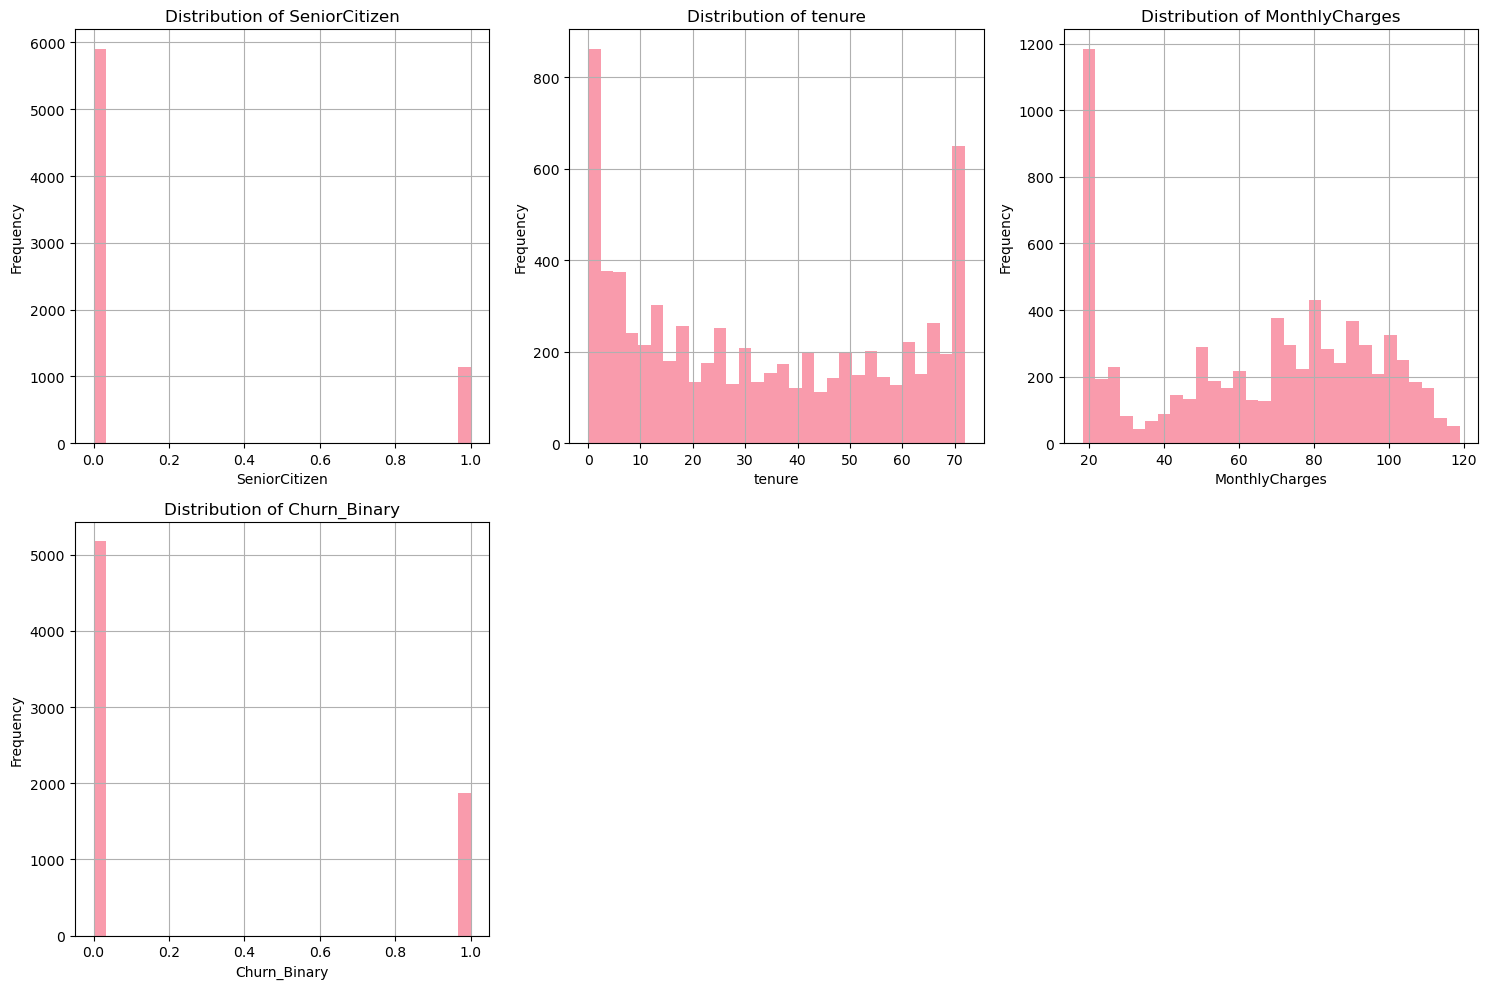

In [13]:
# Numerical features analysis
if len(numerical_cols) > 0:
    print("📈 NUMERICAL FEATURES STATISTICS")
    numerical_stats = df[numerical_cols].describe()
    print(numerical_stats)
    
    # Plot distributions
    if len(numerical_cols) > 0:
        n_cols = min(3, len(numerical_cols))
        n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
        
        for i, col in enumerate(numerical_cols):
            if i < len(axes):
                df[col].hist(bins=30, ax=axes[i], alpha=0.7)
                axes[i].set_title(f'Distribution of {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frequency')
        
        # Hide empty subplots
        for i in range(len(numerical_cols), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()

In [14]:
# Categorical features analysis
if len(categorical_cols) > 0:
    print("📝 CATEGORICAL FEATURES ANALYSIS")
    
    for col in categorical_cols:
        unique_count = df[col].nunique()
        print(f"\n{col}:")
        print(f"  Unique values: {unique_count}")
        
        if unique_count <= 10:  # Show value counts for columns with <= 10 unique values
            value_counts = df[col].value_counts()
            print(f"  Value counts:")
            for value, count in value_counts.head().items():
                print(f"    {value}: {count} ({count/len(df)*100:.1f}%)")
        else:
            print(f"  Top 5 values: {df[col].value_counts().head().index.tolist()}")

📝 CATEGORICAL FEATURES ANALYSIS

customerID:
  Unique values: 7043
  Top 5 values: ['7590-VHVEG', '3791-LGQCY', '6008-NAIXK', '5956-YHHRX', '5365-LLFYV']

gender:
  Unique values: 2
  Value counts:
    Male: 3555 (50.5%)
    Female: 3488 (49.5%)

Partner:
  Unique values: 2
  Value counts:
    No: 3641 (51.7%)
    Yes: 3402 (48.3%)

Dependents:
  Unique values: 2
  Value counts:
    No: 4933 (70.0%)
    Yes: 2110 (30.0%)

PhoneService:
  Unique values: 2
  Value counts:
    Yes: 6361 (90.3%)
    No: 682 (9.7%)

MultipleLines:
  Unique values: 3
  Value counts:
    No: 3390 (48.1%)
    Yes: 2971 (42.2%)
    No phone service: 682 (9.7%)

InternetService:
  Unique values: 3
  Value counts:
    Fiber optic: 3096 (44.0%)
    DSL: 2421 (34.4%)
    No: 1526 (21.7%)

OnlineSecurity:
  Unique values: 3
  Value counts:
    No: 3498 (49.7%)
    Yes: 2019 (28.7%)
    No internet service: 1526 (21.7%)

OnlineBackup:
  Unique values: 3
  Value counts:
    No: 3088 (43.8%)
    Yes: 2429 (34.5%)
    N

## 📊 Churn Analysis by Features

📊 CHURN ANALYSIS BY CATEGORICAL FEATURES


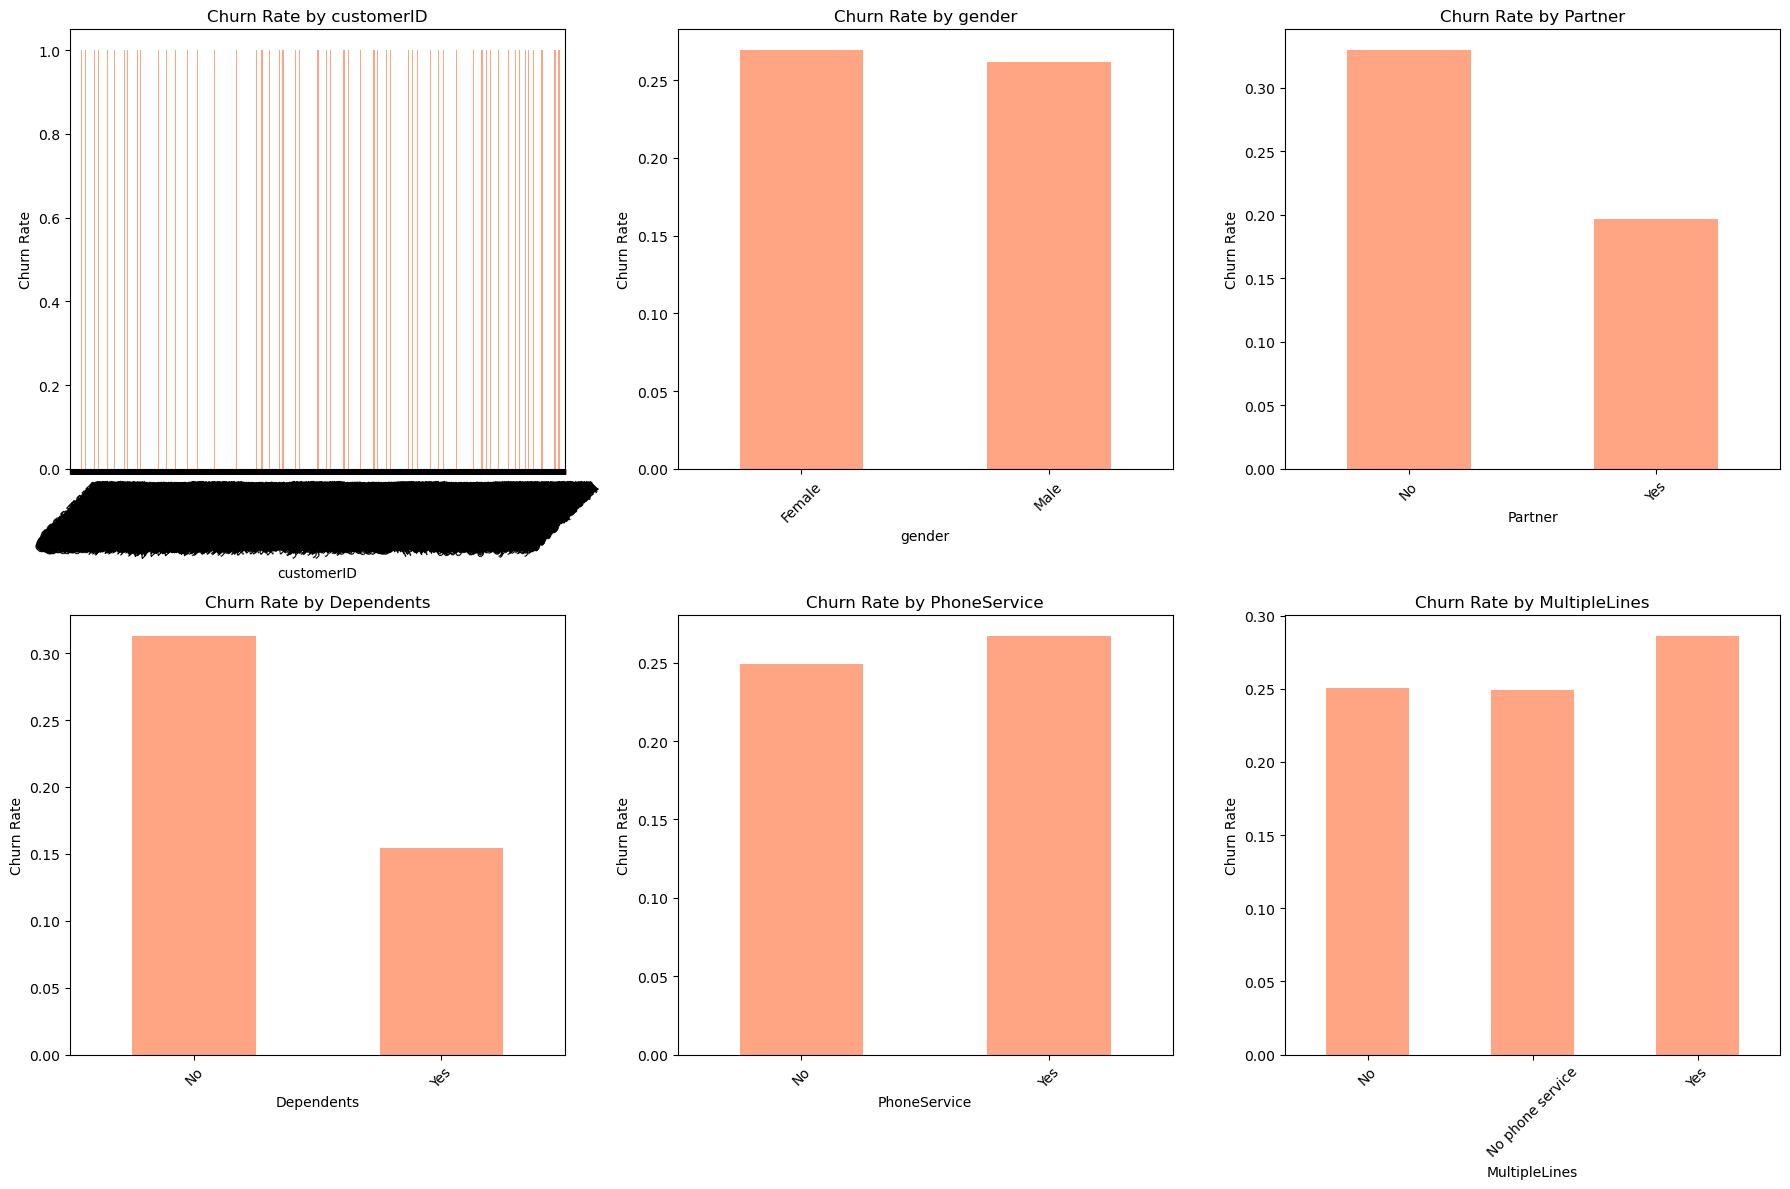

In [15]:
# Analyze churn by categorical features
if 'Churn_Binary' in df.columns and len(categorical_cols) > 0:
    print("📊 CHURN ANALYSIS BY CATEGORICAL FEATURES")
    
    # Select top categorical features for visualization
    top_categorical = categorical_cols[:6]  # Show first 6 categorical features
    
    n_cols = 3
    n_rows = (len(top_categorical) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
    for i, col in enumerate(top_categorical):
        if i < len(axes):
            # Calculate churn rate by category
            churn_by_category = df.groupby(col)['Churn_Binary'].agg(['count', 'mean']).reset_index()
            churn_by_category.columns = [col, 'Total_Customers', 'Churn_Rate']
            
            # Plot
            churn_by_category.plot(x=col, y='Churn_Rate', kind='bar', ax=axes[i], 
                                 color='coral', alpha=0.7)
            axes[i].set_title(f'Churn Rate by {col}')
            axes[i].set_ylabel('Churn Rate')
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].legend().set_visible(False)
    
    # Hide empty subplots
    for i in range(len(top_categorical), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

## 📈 Correlation Analysis

📈 CORRELATION ANALYSIS


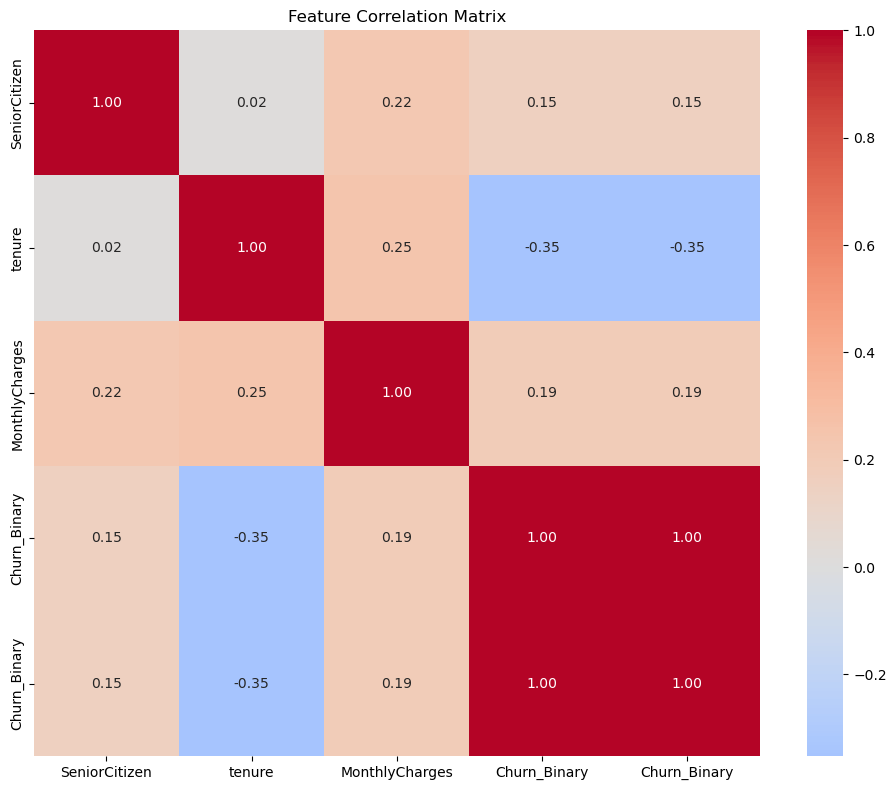


🎯 Correlation with Churn:


TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [16]:
# Correlation analysis for numerical features
if len(numerical_cols) > 1:
    print("📈 CORRELATION ANALYSIS")
    
    # Add binary churn for correlation
    correlation_cols = numerical_cols.copy()
    if 'Churn_Binary' in df.columns:
        correlation_cols.append('Churn_Binary')
    
    correlation_matrix = df[correlation_cols].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f')
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Show correlation with churn
    if 'Churn_Binary' in df.columns:
        print("\n🎯 Correlation with Churn:")
        churn_correlation = correlation_matrix['Churn_Binary'].drop('Churn_Binary').sort_values(key=abs, ascending=False)
        print(churn_correlation)
else:
    print("📈 Not enough numerical features for correlation analysis")

## 💾 Save Processed Data

In [17]:
# Save the processed data with binary churn column
if 'Churn_Binary' in df.columns:
    df.to_csv('../data/telco_processed_basic.csv', index=False)
    print("✅ Processed data saved as '../data/telco_processed_basic.csv'")

print("\n📋 SUMMARY:")
print(f"✅ Dataset successfully explored")
print(f"✅ {df.shape[0]:,} customers analyzed")
print(f"✅ {df.shape[1]} features identified")
if 'Churn_Binary' in df.columns:
    print(f"✅ Churn rate: {df['Churn_Binary'].mean():.1%}")
print(f"✅ Ready for feature engineering and modeling")

print("\n🚀 Next steps:")
print("1. Run notebook: 02_feature_engineering.ipynb")
print("2. Run notebook: 03_exploratory_data_analysis.ipynb")
print("3. Run notebook: 04_machine_learning_models.ipynb")

✅ Processed data saved as '../data/telco_processed_basic.csv'

📋 SUMMARY:
✅ Dataset successfully explored
✅ 7,043 customers analyzed
✅ 22 features identified
✅ Churn rate: 26.5%
✅ Ready for feature engineering and modeling

🚀 Next steps:
1. Run notebook: 02_feature_engineering.ipynb
2. Run notebook: 03_exploratory_data_analysis.ipynb
3. Run notebook: 04_machine_learning_models.ipynb
